#                                                                      Final_ML_Project
           BY MANOJ NAIK.


1 Loan Eligibility Prediction
In this notebook kernal, I’m going to predictions customers are eligible for the loan and check
whether what are the missing criteria to know why customer not getting loan to make there own
house.
Steps are:
1. Gathering Data
2. Exploratory Data Analysis
3. Data Visualizations
4. Machine Learning Model Decision.
5. Traing the ML Model
6. Predict Model

In [1]:
import numpy as np # linear algreba
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
load_train = pd.read_csv('loan-train.csv')
load_test = pd.read_csv('loan-test.csv')

In [3]:
# here we showing 1st five rows of dataset
load_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
load_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# here we showing rows and columns in dataset
load_train.shape

(614, 13)

In [7]:
 # here we showing total numbers of columns in dataset
load_train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# to understand data we use data.describe function
load_train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
 # info() function shows what type of column , how many rows, what are features␣,→there, null values
load_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 3 EDA

<AxesSubplot:>

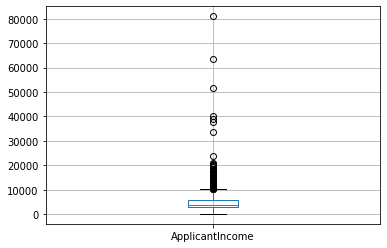

In [11]:
load_train.boxplot('ApplicantIncome')

<AxesSubplot:>

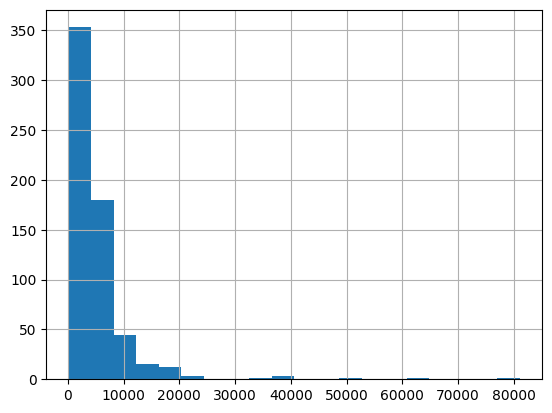

In [12]:
load_train['ApplicantIncome'].hist(bins =20)

In [13]:
# ApplicantIncome is right skewed
load_train['ApplicantIncome'].skew()

6.539513113994625

<AxesSubplot:>

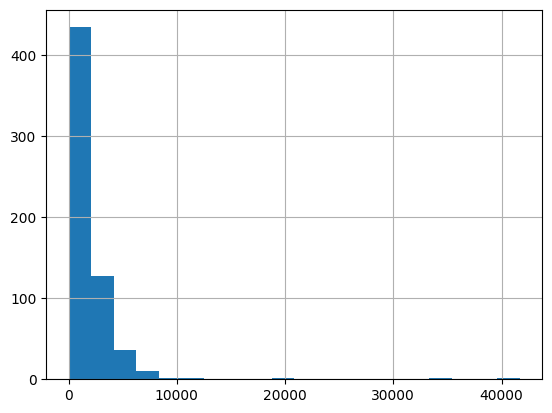

In [15]:
load_train['CoapplicantIncome'].hist(bins =20)


In [16]:
load_train['CoapplicantIncome'].skew()


7.491531216657306

<AxesSubplot:>

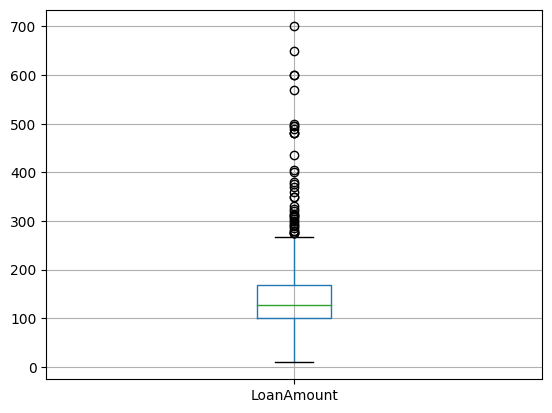

In [17]:
load_train.boxplot('LoanAmount')

<AxesSubplot:>

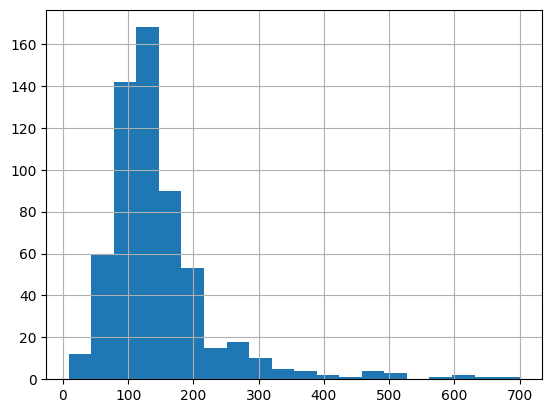

In [18]:
load_train['LoanAmount'].hist(bins =20)

In [19]:
load_train['LoanAmount'].skew()

2.677551679256059

In [20]:
pd.crosstab(load_train['Credit_History'],load_train['Loan_Status'] )

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [21]:
 # we see here Credit_History =0 are less eligible for loan approval
# # we see here Credit_History =1 are more eligible for loan approval

In [23]:
load_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As you can see that there are many columns with null values but they are small in number so we
can replcae them with mean or mode of the particular column

In [25]:
load_train['LoanAmount'].fillna(load_train['LoanAmount'].mean(), inplace=True)# Mean
load_test['LoanAmount'].fillna(load_test['LoanAmount'].mean(), inplace=True) #␣,→Mean

In [26]:
load_train['Loan_Amount_Term'].fillna(load_train['Loan_Amount_Term'].mean(),inplace =True)
load_test['Loan_Amount_Term'].fillna(load_test['Loan_Amount_Term'].mean(),inplace =True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

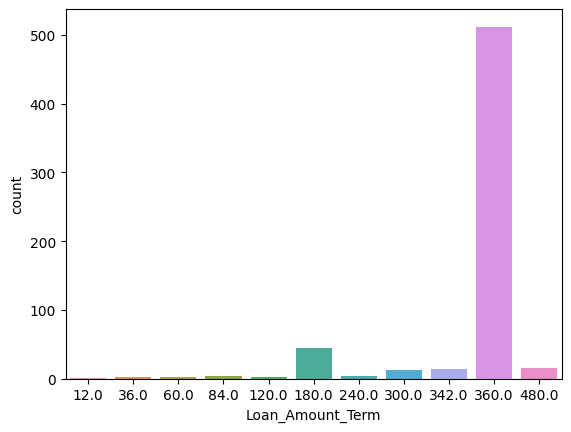

In [27]:
sns.countplot(load_train['Loan_Amount_Term'])

In [30]:
load_train['Credit_History'].fillna(load_train['Credit_History'].mean(),inplace=True)
load_test['Credit_History'].fillna(load_test['Credit_History'].mean(),inplace=True)

In [31]:
load_train['Dependents'].fillna(load_train['Dependents'].mode(),inplace =True)
load_test['Dependents'].fillna(load_test['Dependents'].mode(),inplace =True)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

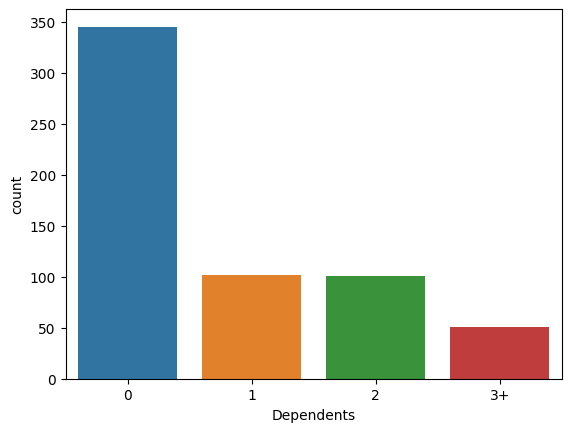

In [32]:
sns.countplot(load_train['Dependents'])

In [33]:
load_train.Gender = load_train.Gender.replace({"Male": 1, "Female" : 0})
load_test.Gender = load_test.Gender.replace({"Male" :1, "Female":0})

In [34]:
load_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [35]:
load_train.Married = load_train.Married.replace({"Yes": 1, "No": 0})
load_test.Married = load_test.Married.replace({"Yes": 1, "No": 0})

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

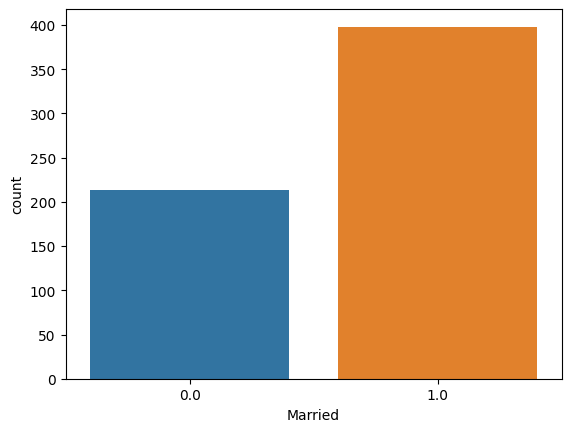

In [36]:
sns.countplot(load_train['Married'])

In [37]:
load_train.Self_Employed = load_train.Self_Employed.replace({"Yes" :1, "No":0})
load_test.Self_Employed = load_test.Self_Employed.replace({"Yes" :1, "No":0})

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

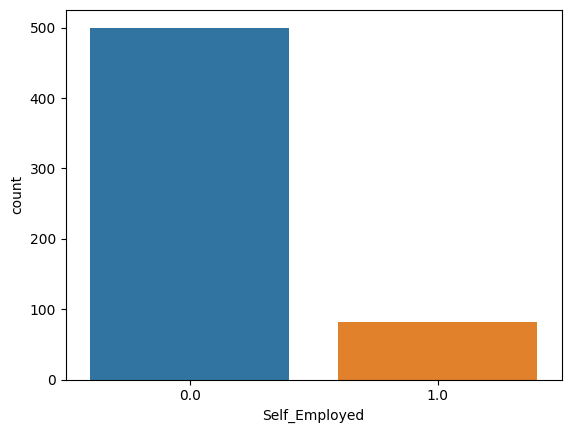

In [38]:
 sns.countplot(load_train['Self_Employed'])

In [39]:
load_train.Loan_Status = load_train.Loan_Status.replace({"Y" :1, "N":0})


In [40]:
load_train['Gender'].fillna(load_train['Gender'].mean(), inplace =True)
load_test['Gender'].fillna(load_test['Gender'].mean(), inplace =True)


In [41]:
load_train['Married'].fillna(load_train['Married'].mean(),inplace =True)
load_test['Married'].fillna(load_test['Married'].mean(),inplace =True)


In [43]:
from sklearn.preprocessing import LabelEncoder
columns = ['Property_Area', 'Dependents', 'Education']
le = LabelEncoder()
for col in columns:
    load_train[col]= le.fit_transform(load_train[col])
    load_test[col]= le.fit_transform(load_test[col])


In [44]:
load_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [45]:
 load_train.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
load_train['Self_Employed'].fillna(load_train['Self_Employed'].mean(),inplace=True)
load_test['Self_Employed'].fillna(load_test['Self_Employed'].mean(),inplace=True)

In [49]:
 load_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


<AxesSubplot:>

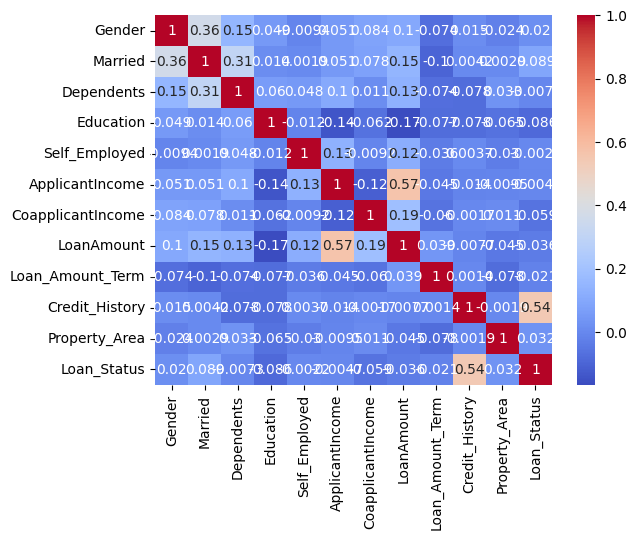

In [50]:
sns.heatmap(load_train.corr(),cmap = 'coolwarm', annot =True, )

In [51]:
load_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364794,0.150043,0.048978,-0.009375,0.050679,0.083658,0.100614,-0.073672,0.015345,-0.024325,0.019619
Married,0.364794,1.000000,0.306155,0.014214,0.001873,0.051304,0.077726,0.146976,-0.101997,0.004241,0.002915,0.089180
Dependents,0.150043,0.306155,1.000000,0.060466,0.048347,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.048978,0.014214,0.060466,1.000000,-0.012041,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.009375,0.001873,0.048347,-0.012041,1.000000,0.129355,-0.009227,0.117577,-0.035794,0.003747,-0.030302,-0.002245
ApplicantIncome,0.050679,0.051304,0.103416,-0.140760,0.129355,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.083658,0.077726,0.011146,-0.062290,-0.009227,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.100614,0.146976,0.130722,-0.166998,0.117577,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073672,-0.101997,-0.073683,-0.077242,-0.035794,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.015345,0.004241,-0.077539,-0.077936,0.003747,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


In [53]:
X = load_train.drop(columns =['Loan_Status','Loan_ID','Married','Dependents','Self_Employed','Loan_Amount_Term','Property_Area','CoapplicantIncome'],axis =1)
y = load_train['Loan_Status']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size= 0.3,random_state= 50)

In [56]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train= scale.fit_transform(X_train)
X_test= scale.fit_transform(X_test)


4 logistic_regression
Logistic regression is one of the most popular Machine Learning algorithms, which comes under the
Supervised Learning technique. It is used for predicting the categorical dependent variable using a
given set of independent variables.
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome
must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but
instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0
and 1.
Logistic Regression is much similar to the Linear Regression except that how they are used. Linear
Regression is used for solving Regression problems, whereas Logistic regression is used for solving
the classification problems.
In Logistic regression, instead of fitting a regression line, we fit an “S” shaped logistic function,
which predicts two maximum values (0 or 1).
from PIL import Image img = Image.open(‘logistic-regression-in-machine-learning.png’) img

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.87      0.42      0.57        62
           1       0.77      0.97      0.86       123

    accuracy                           0.78       185
   macro avg       0.82      0.69      0.71       185
weighted avg       0.80      0.78      0.76       185

accuracy score:: 0.7837837837837838


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


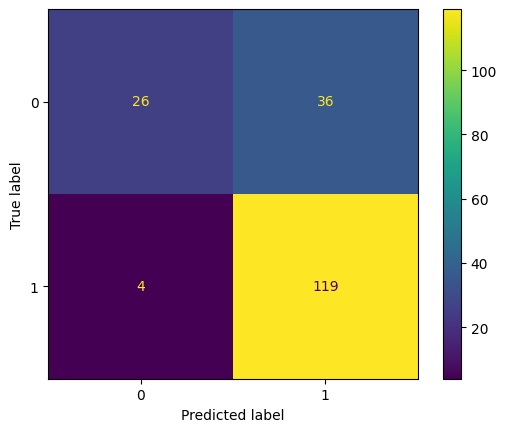

In [60]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(classification_report(y_test, pred))
print("accuracy score::", accuracy_score(y_test, pred))
lr_results = accuracy_score(y_test, pred)
plot_confusion_matrix(lr, X_test, y_test)

5 decision_tree
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured
classifier, where internal nodes represent the features of a dataset, branches represent the decision
rules and each leaf node represents the outcome.
In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes
are used to make any decision and have multiple branches, whereas Leaf nodes are the output of
those decisions and do not contain any further branches.
The decisions or the test are performed on the basis of features of the given dataset.
It is a graphical representation for getting all the possible solutions to a problem/decision based
on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands
on further branches and constructs a tree-like structure.
In order to build a tree, we use the CART algorithm, which stands for Classification and Regression
Tree algorithm

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        62
           1       0.79      0.77      0.78       123

    accuracy                           0.71       185
   macro avg       0.67      0.68      0.68       185
weighted avg       0.71      0.71      0.71       185

accuracy score:: 0.7081081081081081


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


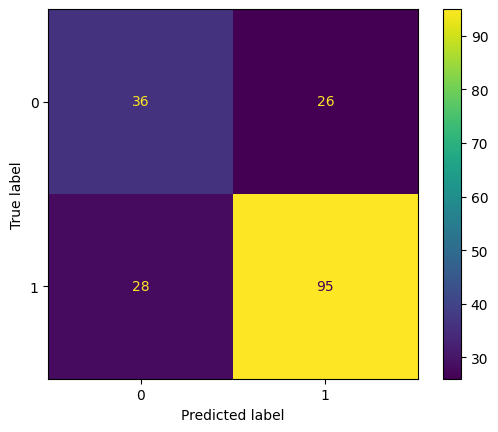

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=50)
tree.fit(X_train,y_train)
pred = tree.predict(X_test)
print(classification_report(y_test, pred))
print("accuracy score::", accuracy_score(y_test, pred))
tree_results = accuracy_score(y_test, pred)
plot_confusion_matrix(tree, X_test,y_test)


6 support vector machine
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms,
which is used for Classification as well as Regression problems. However, primarily, it is used for
Classification problems in Machine Learning.
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate
n-dimensional space into classes so that we can easily put the new data point in the correct category
in the future. This best decision boundary is called a hyperplane.
SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases
are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider
the below diagram in which there are two different categories that are classified using a decision
boundary or hyperplane:

In [64]:
from sklearn import svm

              precision    recall  f1-score   support

           0       0.87      0.44      0.58        62
           1       0.77      0.97      0.86       123

    accuracy                           0.79       185
   macro avg       0.82      0.70      0.72       185
weighted avg       0.81      0.79      0.77       185

accuracy score:: 0.7891891891891892


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


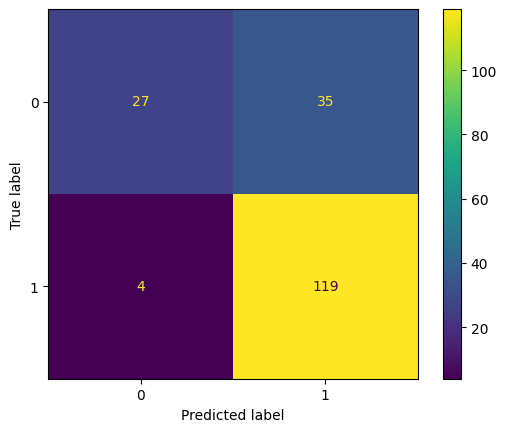

In [65]:
 svc = svm.SVC(kernel='linear',random_state= 0)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
print(classification_report(y_test, pred))
print("accuracy score::", accuracy_score(y_test, pred))
svc_results = accuracy_score(y_test, pred)
plot_confusion_matrix(svc, X_test,y_test)


In [66]:
# now we creating a dataset for visualise over result
data = {'logisticregression': round(lr_results,2),
        'decision tree': round(tree_results,2),
        'SVM': round(svc_results,2)}
algo = list(data.keys())
values = list(data.values())


Text(0.5, 1.0, 'comparision')

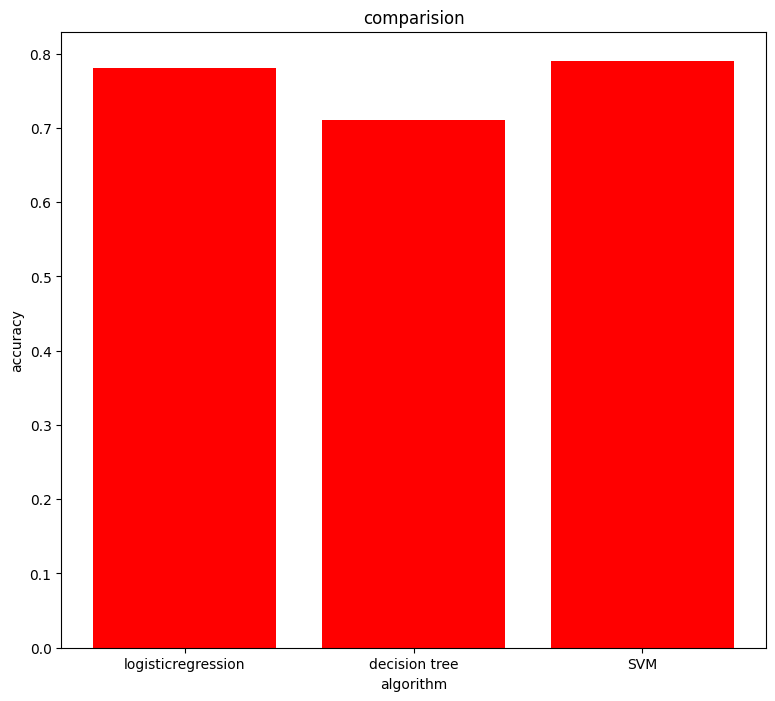

# Thank you